In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils.vis_utils import plot_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, "dataset")

In [3]:
orig_dataset = os.path.join(DATA_PATH, "train")

save_small_data = os.path.join(DATA_PATH, "small_data")
if not os.path.exists(save_small_data):
    os.mkdir(save_small_data)

In [4]:
small_train_data = os.path.join(save_small_data, "train")
if not os.path.exists(small_train_data):
    os.mkdir(small_train_data)
    
small_validation_data = os.path.join(save_small_data, "validation")
if not os.path.exists(small_validation_data):
    os.mkdir(small_validation_data)

small_test_data = os.path.join(save_small_data, "test")
if not os.path.exists(small_test_data):
    os.mkdir(small_test_data)

In [5]:
train_dogs_data = os.path.join(small_train_data, 'dogs')
if not os.path.exists(train_dogs_data):
    os.mkdir(train_dogs_data)

train_cats_data = os.path.join(small_train_data, 'cats')
if not os.path.exists(train_cats_data):
    os.mkdir(train_cats_data)

In [6]:
validation_dogs_data = os.path.join(small_validation_data, 'dogs')
if not os.path.exists(validation_dogs_data):
    os.mkdir(validation_dogs_data)
    
validation_cats_data = os.path.join(small_validation_data, 'cats')
if not os.path.exists(validation_cats_data):
    os.mkdir(validation_cats_data)

In [7]:
test_dogs_data = os.path.join(small_test_data, 'dogs')
if not os.path.exists(test_dogs_data):
    os.mkdir(test_dogs_data)
    
test_cats_data = os.path.join(small_test_data, 'cats')
if not os.path.exists(test_cats_data):
    os.mkdir(test_cats_data)

In [8]:
mv_cats = ["cat.{}.jpg".format(i) for i in range(1000)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(train_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，訓練的貓咪已全部複製完畢")

mv_cats = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(validation_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，驗證的貓咪已全部複製完畢")

mv_cats = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(test_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，測試的貓咪已全部複製完畢")

報告班長，訓練的貓咪已全部複製完畢
報告班長，驗證的貓咪已全部複製完畢
報告班長，測試的貓咪已全部複製完畢


In [9]:
mv_dogs = ["dog.{}.jpg".format(i) for i in range(1000)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(train_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，訓練的狗狗已全部複製完畢")

mv_dogs = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(validation_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，驗證的狗狗已全部複製完畢")

mv_dogs = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(test_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，測試的狗狗已全部複製完畢")

報告班長，訓練的狗狗已全部複製完畢
報告班長，驗證的狗狗已全部複製完畢
報告班長，測試的狗狗已全部複製完畢


In [10]:
print('報告班長 訓練貓咪集，應到1000隻，實到', len(os.listdir(train_cats_data)),'隻，報告完畢。')
print('報告班長 訓練狗狗集，應到1000隻，實到', len(os.listdir(train_dogs_data)),'隻，報告完畢。')
print('報告班長 驗證貓咪集，應到500 隻，實到', len(os.listdir(validation_cats_data)),' 隻，報告完畢。')
print('報告班長 驗證狗狗集，應到500 隻，實到', len(os.listdir(validation_dogs_data)),' 隻，報告完畢。')
print('報告班長 測試貓咪集，應到500 隻，實到', len(os.listdir(test_cats_data)),' 隻，報告完畢。')
print('報告班長 測試狗狗集，應到500 隻，實到', len(os.listdir(test_dogs_data)),' 隻，報告完畢。')

報告班長 訓練貓咪集，應到1000隻，實到 1000 隻，報告完畢。
報告班長 訓練狗狗集，應到1000隻，實到 1000 隻，報告完畢。
報告班長 驗證貓咪集，應到500 隻，實到 500  隻，報告完畢。
報告班長 驗證狗狗集，應到500 隻，實到 500  隻，報告完畢。
報告班長 測試貓咪集，應到500 隻，實到 500  隻，報告完畢。
報告班長 測試狗狗集，應到500 隻，實到 500  隻，報告完畢。


In [11]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [12]:
target_number = 130

In [13]:
# 直接從檔案目錄讀取圖像檔資料
train_generator = train_datagen.flow_from_directory( 
        # 這是圖像資料的目錄
        small_train_data,
        # 所有的圖像大小會被轉換成150x150
        target_size=(target_number, target_number),
        # 每次產生20圖像的批次資料
        batch_size=20,
        # 由於這是一個二元分類問題, y的lable值也會被轉換成二元的標籤
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
#直接從檔案目錄讀取圖像檔資料
validation_generator = test_datagen.flow_from_directory(
        small_validation_data,
        target_size=(target_number, target_number),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 130, 130, 3)
labels batch shape: (20,)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 130, 130, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 128, 128, 3)       84        
_________________________________________________________________
conv2 (Conv2D)               (None, 126, 126, 10)      280       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 63, 63, 10)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 61, 61, 3)         273       
_________________________________________________________________
conv4 (Conv2D)               (None, 59, 59, 5)         140       
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 29, 29, 5)         0         
__________

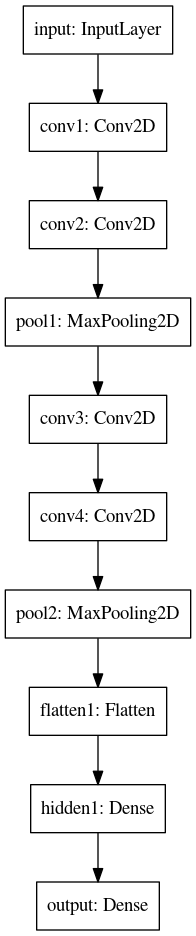

In [16]:
image_input = Input(shape=(target_number, target_number, 3), name='input')

conv1 = Conv2D(3, kernel_size=3, activation='relu', name='conv1')(image_input)
conv2 = Conv2D(10, kernel_size=3, activation='relu', name='conv2')(conv1)
pool1 = MaxPool2D(pool_size=(2, 2), strides=(2,2), name='pool1')(conv2)

conv3 = Conv2D(3, kernel_size=3, activation='relu', name='conv3')(pool1)
conv4 = Conv2D(5, kernel_size=3, activation='relu', name='conv4')(conv3)
pool2 = MaxPool2D(pool_size=(3, 3), strides=(2,2), name='pool2')(conv4)

flatten1 = Flatten(name='flatten1')(pool2)

hidden1 = Dense(100, activation='sigmoid', name='hidden1')(flatten1)
output = Dense(1, activation='sigmoid', name='output')(hidden1)
model = Model(inputs=image_input, outputs=output)

model.summary()

plot_model(model, to_file='convolutional_neural_network.png')

Image('convolutional_neural_network.png')

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer="adadelta",
              metrics=['acc'])

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            #patience=2, 
                                            #verbose=1, 
                                            #factor=0.5, 
                                            #min_lr=0.00001)
#callbacks = [earlystop, learning_rate_reduction]
callbacks = [earlystop]

In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 27s 275ms/step - loss: 0.6984 - acc: 0.5095 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/50
100/100 [==============================] - 23s 234ms/step - loss: 0.6861 - acc: 0.5510 - val_loss: 0.6737 - val_acc: 0.5650
Epoch 3/50
100/100 [==============================] - 23s 227ms/step - loss: 0.6573 - acc: 0.6080 - val_loss: 0.6441 - val_acc: 0.6300
Epoch 4/50
100/100 [==============================] - 27s 268ms/step - loss: 0.6369 - acc: 0.6435 - val_loss: 0.6507 - val_acc: 0.6220
Epoch 5/50
100/100 [==============================] - 29s 288ms/step - loss: 0.6078 - acc: 0.6770 - val_loss: 0.6419 - val_acc: 0.6260
Epoch 6/50
100/100 [==============================] - 28s 280ms/step - loss: 0.5809 - acc: 0.6895 - val_loss: 0.6866 - val_acc: 0.6250
Epoch 7/50
100/100 [==============================] - 28s 282ms/step - loss: 0.5511 - acc: 0.7290 - val_loss: 0.6657 - val_acc: 0.6410
Epoch 8/50
100/100 [==============================] - 3

In [20]:
model.save('cats_and_dogs_small_2.h5')

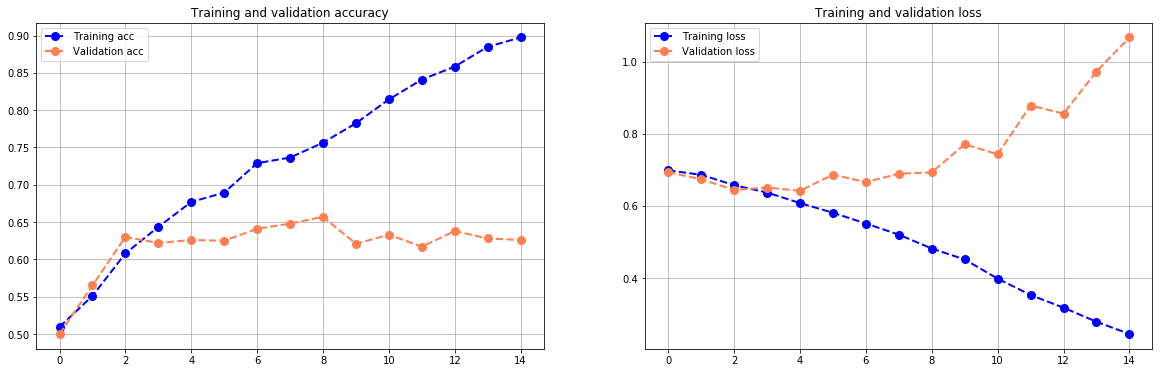

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20,6))


plt.subplot(1,2,1)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(epochs, acc, linewidth = '2', label = "Training acc", color='blue', linestyle='--', marker='o', markersize=8)
plt.plot(epochs, val_acc, linewidth = '2', label = "Validation acc", color='coral', linestyle='--', marker='o', markersize=8)
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.grid(True)
plt.plot(epochs, loss, linewidth = '2', label = "Training loss", color='blue', linestyle='--', marker='o', markersize=8)
plt.plot(epochs, val_loss, linewidth = '2', label = "Validation loss", color='coral', linestyle='--', marker='o', markersize=8)
plt.title('Training and validation loss')
plt.legend()

plt.show()